In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [4]:
def init_params():
    B1 = np.random.rand(10, 1) - 0.5
    W1 = np.random.rand(10, 784) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    B2 = np.random.rand(10, 1) - 0.5

    return W1, B1, W2, B2

def ReLU(Z):
    return np.maximum(Z, 0)

def soft_max(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True)) 
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1,B1,W2,B2,X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = soft_max(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) 
    one_hot_Y[np.arange(Y.size), Y] = 1 
    one_hot_Y = one_hot_Y.T

    return one_hot_Y

def derivative_ReLU(Z):
    return Z > 0

def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = (W2.T).dot(dZ2)*derivative_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, dB1, dW2, dB2

def update_prams(W1,B1,W2,B2,dW1,dB1, dW2, dB2, alpha):
    W1 = W1 - alpha*dW1
    B1 = B1 - alpha*dB1
    W2 = W2 - alpha*dW2
    B2 = B2 - alpha*dB2

    return W1, B1, W2, B2



In [5]:
def get_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, X_val, Y_val, itterations, alpha):
    W1, B1, W2, B2 = init_params()
    for i in range (itterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, B1, W2, B2 = update_prams(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 10 == 0:
            print(f"Iterations: {i}")
            print(f"Accuracy: {get_accuracy(get_prediction(A2), Y)}")

            _, _, _, A2_val = forward_prop(W1, B1, W2, B2, X_val)
            val_acc = get_accuracy(get_prediction(A2_val), Y_val)
            print(f"Validation Accuracy: {val_acc}\n")

    return W1, B1, W2, B2

In [6]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, X_dev, Y_dev, 1000, 0.1)

Iterations: 0
Accuracy: 0.04526829268292683
Validation Accuracy: 0.046

Iterations: 10
Accuracy: 0.14509756097560975
Validation Accuracy: 0.141

Iterations: 20
Accuracy: 0.20173170731707318
Validation Accuracy: 0.197

Iterations: 30
Accuracy: 0.2644146341463415
Validation Accuracy: 0.274

Iterations: 40
Accuracy: 0.3218780487804878
Validation Accuracy: 0.325

Iterations: 50
Accuracy: 0.3761707317073171
Validation Accuracy: 0.392

Iterations: 60
Accuracy: 0.42529268292682926
Validation Accuracy: 0.436

Iterations: 70
Accuracy: 0.4750731707317073
Validation Accuracy: 0.478

Iterations: 80
Accuracy: 0.5311707317073171
Validation Accuracy: 0.538

Iterations: 90
Accuracy: 0.5796341463414634
Validation Accuracy: 0.567

Iterations: 100
Accuracy: 0.6132682926829268
Validation Accuracy: 0.59

Iterations: 110
Accuracy: 0.6397317073170732
Validation Accuracy: 0.618

Iterations: 120
Accuracy: 0.6638780487804878
Validation Accuracy: 0.647

Iterations: 130
Accuracy: 0.6848780487804879
Validation Acc

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


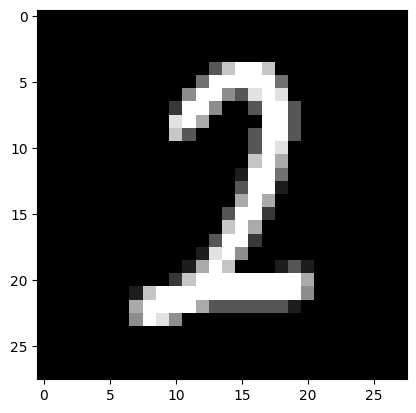

Prediction:  [4]
Label:  4


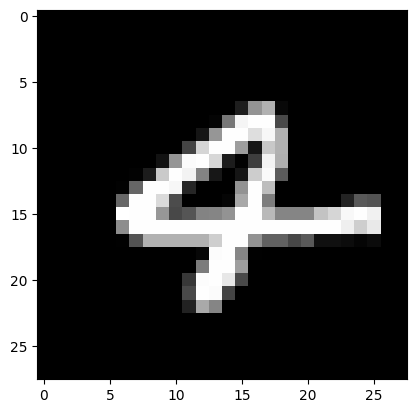

Prediction:  [1]
Label:  1


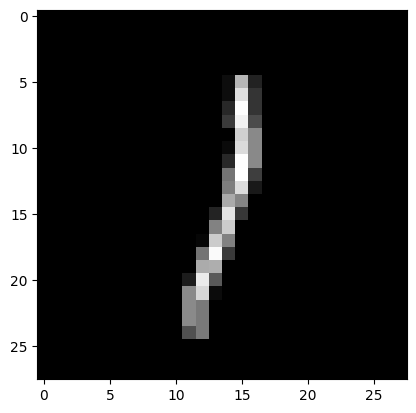

Prediction:  [0]
Label:  0


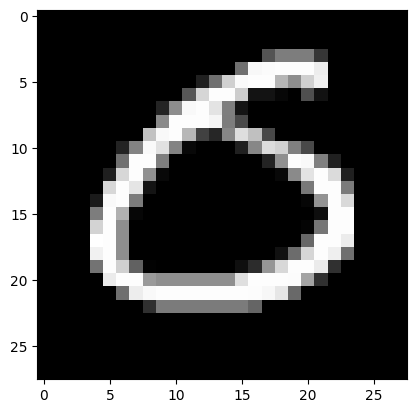

In [8]:
test_prediction(0, W1, B1, W2, B2)
test_prediction(10, W1, B1, W2, B2)
test_prediction(50, W1, B1, W2, B2)
test_prediction(100, W1, B1, W2, B2)

Prediction:  [2]


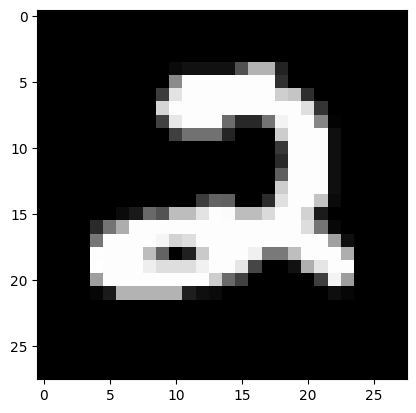

Prediction:  [5]


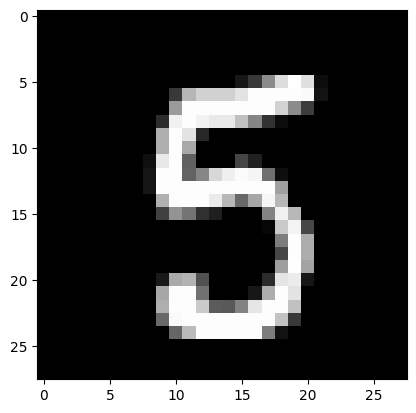

Prediction:  [6]


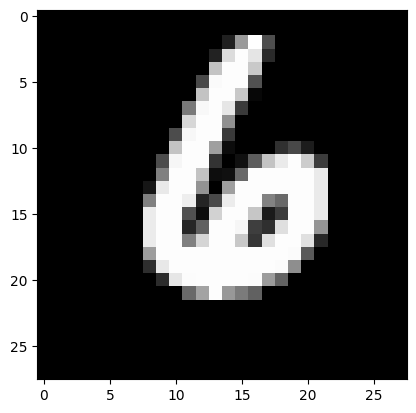

Prediction:  [0]


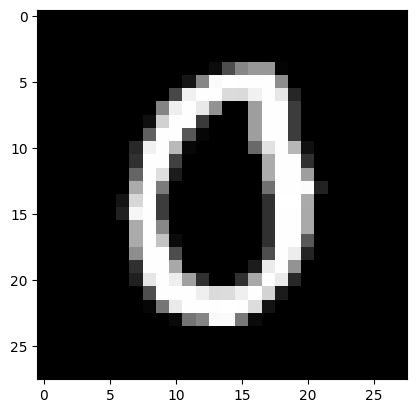

In [9]:
test_data = pd.read_csv('test.csv')
test_data = np.array(test_data)
test_data = test_data.T
test_data = test_data / 255.

def test_prediction_no_label(index, W1, b1, W2, b2):
    current_image = test_data[:, index, None]
    prediction = make_predictions(test_data[:, index, None], W1, b1, W2, b2)
    print("Prediction: ", prediction)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction_no_label(0, W1, B1, W2, B2)
test_prediction_no_label(10, W1, B1, W2, B2)
test_prediction_no_label(50, W1, B1, W2, B2)
test_prediction_no_label(100, W1, B1, W2, B2)

_, _, _, A2_test = forward_prop(W1, B1, W2, B2, test_data)
test_predictions = get_prediction(A2_test)

submission = pd.DataFrame({'ImageId': np.arange(1, test_predictions.size + 1), 'Label': test_predictions})
submission.to_csv('submission.csv', index=False)